In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv


# 0. Load Data and Split between Train (X) and Target (y)

In [2]:
user_data = pd.read_csv('/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv')
user_data.set_index(keys = 'User ID', inplace = True)
#train_data = train_data.drop('User ID', axis = 1)

In [3]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 1 to 700
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    object 
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 60.2+ KB


In [4]:
user_data['cat_col_concat'] = user_data['Device Model'] + '_' + user_data['Operating System'] + '_' + user_data['Gender']

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(user_data, test_size = 0.2, stratify = user_data['cat_col_concat'])

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 369 to 444
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                560 non-null    object 
 1   Operating System            560 non-null    object 
 2   App Usage Time (min/day)    560 non-null    int64  
 3   Screen On Time (hours/day)  560 non-null    float64
 4   Battery Drain (mAh/day)     560 non-null    int64  
 5   Number of Apps Installed    560 non-null    int64  
 6   Data Usage (MB/day)         560 non-null    int64  
 7   Age                         560 non-null    int64  
 8   Gender                      560 non-null    object 
 9   User Behavior Class         560 non-null    int64  
 10  cat_col_concat              560 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 52.5+ KB


In [7]:
X_train = train_data.drop(['User Behavior Class', 'cat_col_concat'], axis = 1)
y_train = train_data['User Behavior Class']

X_test = test_data.drop(['User Behavior Class', 'cat_col_concat'], axis = 1)
y_test = test_data['User Behavior Class']

In [8]:
X_test

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
User ID,,,,,,,,,
89,Xiaomi Mi 11,Android,137,3.3,839,31,348,34,Female
558,Samsung Galaxy S21,Android,198,4.2,1392,43,640,27,Male
5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female
361,Samsung Galaxy S21,Android,517,11.8,2435,86,2208,26,Male
458,OnePlus 9,Android,234,4.7,1707,55,871,46,Male
...,...,...,...,...,...,...,...,...,...
680,iPhone 12,iOS,33,1.8,334,16,113,36,Female
438,iPhone 12,iOS,41,1.7,408,16,291,34,Male
46,Xiaomi Mi 11,Android,502,10.9,2476,96,1935,39,Male


# 1. EDA

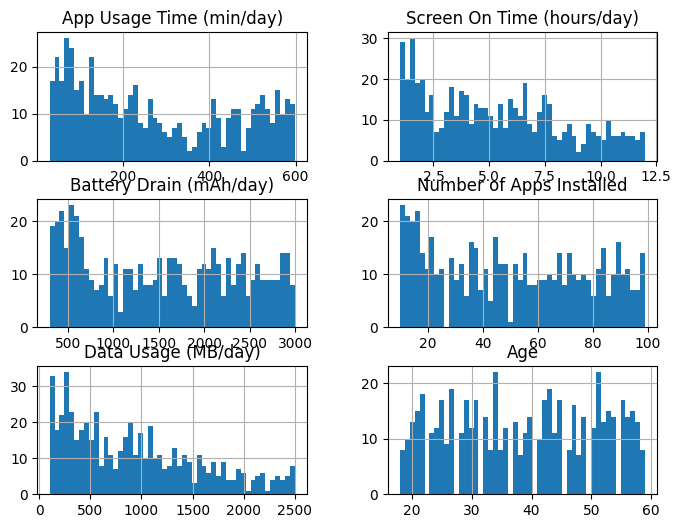

In [9]:
import matplotlib.pyplot as plt

X_train.hist(bins = 50, figsize = (8, 6))
plt.show()

<Axes: ylabel='Frequency'>

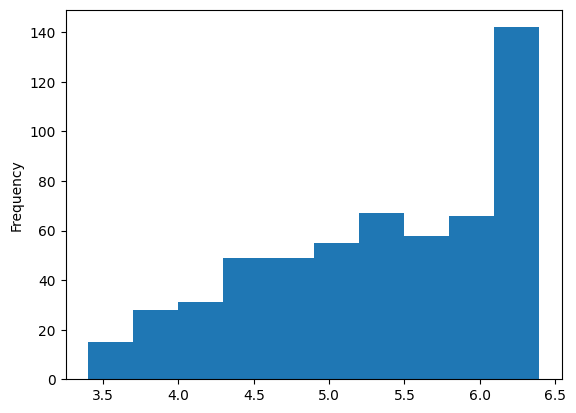

In [10]:
np.log(X_train["App Usage Time (min/day)"]).plot.hist()

<Axes: ylabel='Frequency'>

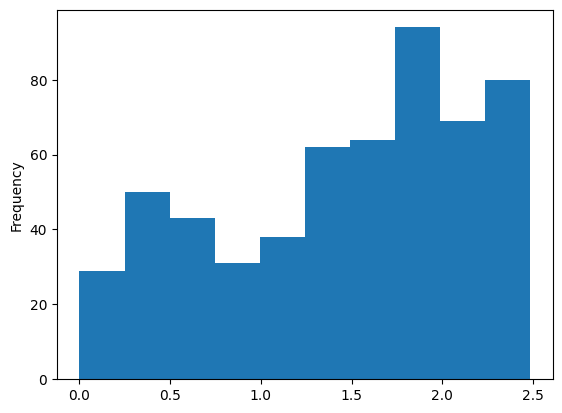

In [11]:
np.log(X_train["Screen On Time (hours/day)"]).plot.hist()

<Axes: ylabel='Frequency'>

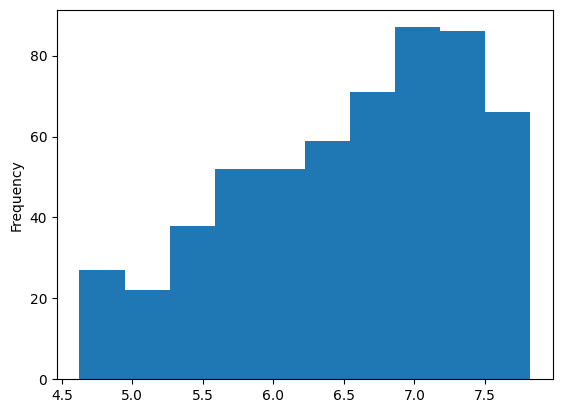

In [12]:
np.log(X_train["Data Usage (MB/day)"]).plot.hist()

In [13]:
X_train_int_col = X_train.select_dtypes(include = ['int']).columns
X_train_float_col = X_train.select_dtypes(include = ['float']).columns
X_train_cat_col = X_train.select_dtypes(include = ['object']).columns

In [14]:
X_train[X_train_cat_col].value_counts()

Device Model        Operating System  Gender
Samsung Galaxy S21  Android           Male      63
Xiaomi Mi 11        Android           Female    63
iPhone 12           iOS               Female    59
Google Pixel 5      Android           Male      58
OnePlus 9           Android           Male      58
iPhone 12           iOS               Male      58
Google Pixel 5      Android           Female    55
Xiaomi Mi 11        Android           Male      54
OnePlus 9           Android           Female    49
Samsung Galaxy S21  Android           Female    43
Name: count, dtype: int64

# 2. Preprocessing Pipelines

In [15]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, FunctionTransformer

ordinal_encoder = OrdinalEncoder()
oh_encoder = OneHotEncoder()
std_scaler = StandardScaler()
log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


log_pipeline = make_pipeline(
    log_transformer,
    std_scaler)

cat_pipeline = make_pipeline(
    ordinal_encoder,
    oh_encoder)

preprocessing = ColumnTransformer([
    ("int", std_scaler, ["App Usage Time (min/day)", "Battery Drain (mAh/day)", "Number of Apps Installed", "Age"]),
    ("log", log_pipeline, ["Screen On Time (hours/day)", "Data Usage (MB/day)"]),
    ("cat", cat_pipeline, X_train_cat_col),
])

# 3. Model Selection and Training

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = make_pipeline(
    preprocessing,
    RandomForestClassifier(n_estimators = 200, max_leaf_nodes = 64, n_jobs = -1)
)

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('int', StandardScaler(),
                                                  ['App Usage Time (min/day)',
                                                   'Battery Drain (mAh/day)',
                                                   'Number of Apps Installed',
                                                   'Age']),
                                                 ('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       inverse_func=<ufunc 'exp'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Screen On Time (hours/day)',
                                                   'Data Usage (MB/day)']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['Device Model', 'Operating System', 'Gender'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_leaf_nodes=64, n_estimators=200,
                                        n_jobs=-1))])

In [18]:
y_test_pred_rf = rf_pipeline.predict(X_test)

# 4. Evaluating Model Performance

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)
cm

array([[25,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0],
       [ 0,  0, 34,  0,  0],
       [ 0,  0,  0, 28,  0],
       [ 0,  0,  0,  0, 23]])

In [20]:
# Precision, Recall, F1
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision: " + precision_score(y_test, y_test_pred_rf, average = 'micro').astype(str))
print("Recall: " + recall_score(y_test, y_test_pred_rf, average = 'micro').astype(str))
print("F1 score: " + f1_score(y_test, y_test_pred_rf, average = 'micro').astype(str))

Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [21]:
from sklearn.model_selection import cross_val_score

cross_val_score(rf_pipeline, X_train, y_train, cv = 3, scoring = "accuracy")

array([1., 1., 1.])

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_auc_score

y_probas_rf = cross_val_predict(rf_pipeline, X_train, y_train, cv = 3, method = "predict_proba")
y_scores_rf = y_probas_rf[:, 1]
roc_auc_score(y_train, y_probas_rf, average = 'macro', multi_class = 'ovo', labels = [1, 2, 3, 4, 5])

1.0

**Conclusion**: RF too effective, lol.